In [18]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kruskal, f_oneway 

# Load data ke dalam dataframe 
df= pd.read_csv('ingredient.csv')

df.info()

print(df)

# Show the descriptive statistics from dataset
descriptive_stats = df.describe()

# Correlation analysis
correlation_matrix = df.corr(method='spearman')

# Perform the Kruskal-Wallis test(non parametric)
statistic, p_value = kruskal(*[df[column] for column in df.columns])

# Perform the one-way ANOVA test(parametric)
statistica, p_valuea = f_oneway(*[df[column] for column in df.columns])


# Print the results
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)
print("One-way ANOVA test statistic:", statistica)
print("p-value:", p_valuea)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB
           a      b     c     d      e     f      g     h     i
0    1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
1    1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
2    1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
3    1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
4    1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...


### Summary 

- additive a have a strong correlation to additive g(0.703777)
- additive b have a strong negative correlation to additive f(-0.584503)
- additive c have a strong negative correlation to additive d(-0.512420)
- additive e have a strong negative correlation to additive a(-0.525733)
- additive h have a strong correlation to additive d(0.474564)
- additive i have a negative correlation in additive b(-0.217631)

Null hypotesis = There are no significant differences among the formulations of petrol with respect to their effects on the burning pattern.

for the parametric and non parametric method i use one way ANOVA and kruskal-Wallis and the output for 2 method shown a strong evidence to reject the null hypotesis so from this output can be concluded  that there are significant differences among the formulations of petrol in terms of their effects on the burning pattern. 

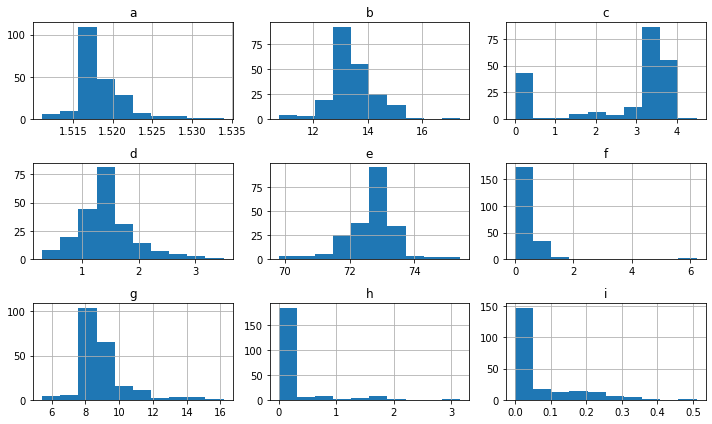

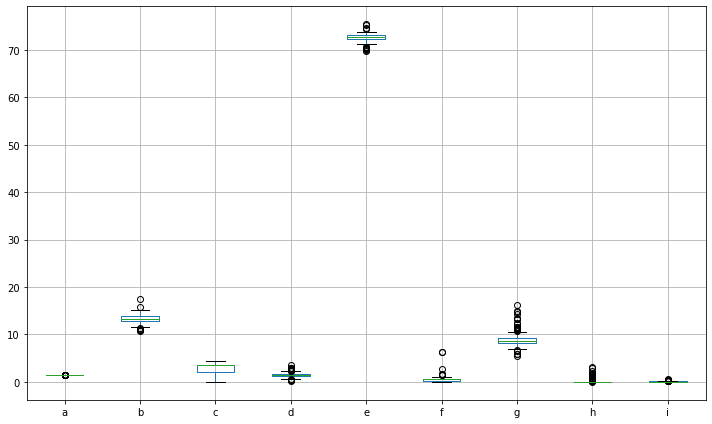

In [6]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Plot box plots
df.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [13]:
from sklearn.cluster import KMeans

# Remove any non-additive columns if present
df = df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']]


# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Number of distinct formulations
num_formulations = len(set(kmeans.labels_))

print("Number of distinct formulations:", num_formulations)

Number of distinct formulations: 3


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


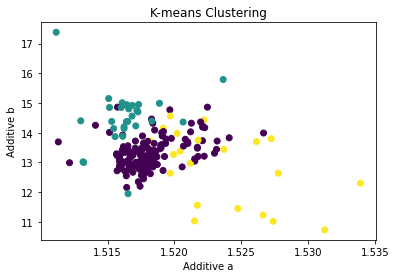

In [14]:
# Visualize the clusters
plt.scatter(df['a'], df['b'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Additive a')
plt.ylabel('Additive b')
plt.title('K-means Clustering')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

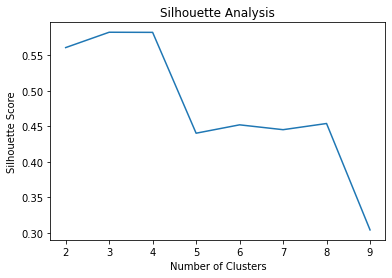

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of possible values for the number of clusters
n_clusters_range = range(2, 10)

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Iterate over each value of n_clusters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the silhouette scores
plt.plot(n_clusters_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

### Summary 

for clustring i using k-means method and using silhouette method to find the best n_cluster, in this result silhouete method best score is 3 and 4 for the n_cluster but after i run it the plot shown better result in n_score 3. 